In [1]:
import requests
import json
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DAYS=30

In [2]:
class Province:
    
    def __init__(self, name):
        self.name = name
        self.daily_diagnosis = {}
        self.daily_asymptomatic = {}
    
    def update_diagnosis(self,date,num):
        self.daily_diagnosis[date]=int(num)
        
    def update_asymptomatic(self,date,num):
        self.daily_asymptomatic[date]=int(num)
        
    

province_list = {}
province_names=["河北","山西","辽宁","吉林","黑龙江","江苏","浙江","安徽","福建","江西","山东","河南","湖北","湖南","广东","海南","四川","贵州","云南","陕西","甘肃","青海","内蒙古","广西","西藏","宁夏","新疆","北京","天津","上海","重庆","兵团","香港","澳门","台湾"]
for province in province_names:
    province_list[province] = Province(province)

In [3]:
class China_total:
    
    def __init__(self):
        self.daily_diagnosis = {}
        self.daily_asymptomatic = {}
    
        
    def update_diagnosis(self,date,num):
        self.daily_diagnosis[date]=int(num)
        
        
    def update_asymptomatic(self,date,num):
        self.daily_asymptomatic[date]=int(num)
    
    
china = China_total()

In [4]:
class Parser:
    def parse(self,prograph,china,province_list):# This prograph is mainly about new cases.
        
        #日期
        date=re.findall(r"(\d+月\d+日)",prograph[0])[0]
        
        print(date)
#         print("\n\n\n")
        
        
        #中国大陆每日本土新增确诊人数
        domestic_new_diagnosis=re.findall(r"本土病例(\d*)例",prograph[0])[0]
#         print("中国大陆每日本土新增确诊人数:",domestic_new_diagnosis)
        china.update_diagnosis(date,domestic_new_diagnosis)
        
        domestic_diagnosis_province_list=re.findall(r"本土病例\d*例（(.*?)）",prograph[0])[0]
        domestic_diagnosis_province=re.findall(r"[，]*(\D+)\d+例",domestic_diagnosis_province_list)
        domestic_diagnosis_province_num=re.findall(r"\D+(\d+)例",domestic_diagnosis_province_list)
        
        for index,province in enumerate(domestic_diagnosis_province):
            province_list.get(province).update_diagnosis(date,domestic_diagnosis_province_num[index])
#             print(province,date,domestic_diagnosis_province_num[index])
        
        
#         print("\n\n\n")
        
        
        
        
        
        #中国大陆每日本土新增无症状人数
        domestic_new_asymptomatic=re.findall(r"新疆生产建设兵团报告新增无症状感染者(\d+)例",prograph[4])[0]
#         print("中国大陆每日本土新增无症状人数:",domestic_new_asymptomatic)
        china.update_asymptomatic(date,domestic_new_asymptomatic)
        
        domestic_asymptomatic_province_list=re.findall(r"本土\d+例（(.*?)）",prograph[4])[0]
        domestic_asymptomatic_province=re.findall(r"[，]*(\D+)\d+例",domestic_asymptomatic_province_list)
        domestic_asymptomatic_province_num=re.findall(r"\D+(\d+)例",domestic_asymptomatic_province_list)
        
        for index,province in enumerate(domestic_asymptomatic_province):
#             print(province,date,domestic_asymptomatic_province_num[index])
            province_list[province].update_asymptomatic(date,domestic_asymptomatic_province_num[index])
        

In [5]:
today = time.strftime("%m%d")
if today[0] == '0':
    today = today[1:2]+"月"+today[2:]+"日"
else:
    today = today[:2]+"月"+today[2:]+"日" 
if today[-3] == '0':
    today = today[:-3]+today[-2:]
today

'9月12日'

In [6]:
base_url='http://www.nhc.gov.cn/xcs/yqtb/list_gzbd'
homepage_url_list=[base_url+".shtml"]
for i in range(2,30):
    homepage_url_list.append(base_url+"_%d.shtml"%i)
for url in homepage_url_list:
    print(url)

http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_2.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_3.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_4.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_5.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_6.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_7.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_8.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_9.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_10.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_11.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_12.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_13.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_14.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_15.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_16.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_17.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_18.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_19.shtml
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd_20.shtml
http://www.

In [7]:
headers={
"GET":"/xcs/yqtb/202209/8ac84d72227c4a318694ddae45412c9a.shtml HTTP/1.1",
"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
"Accept-Encoding": "gzip, deflate",
"Accept-Language": "en,zh-CN;q=0.9,zh;q=0.8,en-GB;q=0.7,en-US;q=0.6",
"Cache-Control": "max-age=0",
"Connection": "keep-alive",
"Cookie": "insert_cookie=91349450; yfx_c_g_u_id_10006654=_ck22091016193310257145017533795; security_session_verify=4a5f3c112034b72078057eea47fcaab3; yfx_f_l_v_t_10006654=f_t_1662797973027__r_t_1662797973027__v_t_1662805227140__r_c_0; sVoELocvxVW0T=53SSEnbWQ1KLqqqDkxXvQlGlOu07WnJuOYrSsW5EtgwKgj5D0Vt6iQqjE7rnnDzdgq2xCGr.pyCDEMlvFY_yDPsJ1M0y2SJR3ovaPvNEoUQ8tQI6F94YYZG4Nn3zaQcuVRVFff6PvW60UcyPWLKQe._BxYMUqdo_TEcNz3L5if8puCPac1SbewqhMiZNZTpeaOqRzW65todn.2Qv0oO3c5QCjbvIw_2fd.6h6ERwOb40qeTZC0oFfCfOnqP7VHKZxCT0UCjwlVjLpR7loQAD68yCliRcoeFqxedL53xPuVeMKwppJQY0G021evAQx5_Tq65Hz4LDpvZdCNsy07lOGn9",
"Host": "www.nhc.gov.cn",
"Upgrade-Insecure-Requests": "1",
"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36 Edg/105.0.1343.27"
}

url_list=[]

for homepage_url in homepage_url_list:
    homepage_soup_res=requests.get(homepage_url,headers=headers).text
    homepage_soup = BeautifulSoup(homepage_soup_res)
    for url in homepage_soup.findAll('li'):
        for a in url.findAll("a"):
            url_list.append("http://www.nhc.gov.cn"+a.attrs["href"])


url_list

['http://www.nhc.gov.cn/xcs/yqtb/202209/093a5fe2183b42169296326741d81565.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/338e611615da4998a1202694eee8f196.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/8ac84d72227c4a318694ddae45412c9a.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/0702822269e648a882c267aa672cebf8.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/78ea88c5c23e41c391376ee9b103cfec.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/b9867ea1be624141b41f461a431239d7.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/892ec8bb4db44a96bd06169ac2d7de09.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/9a6ef43336a2401ca6dc4f2e6f97e5a6.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/cb9e0c28d4b2467fac0ca2871bbfd95b.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/97243736d6e94317810ac51ba23fe189.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/e0a18445e0ab47608527b9c910f77699.shtml',
 'http://www.nhc.gov.cn/xcs/yqtb/202209/b236ae4939f24155a506f0cfb0f16ace.shtml',
 'http://www.nhc.gov.cn/xcs/

In [8]:
for url in url_list[0:DAYS]:
    res = requests.get(url,headers=headers).text
    soup = BeautifulSoup(res,"lxml")
    prograph=[]
    count=0
    for i in soup.findAll("p"):
        if i.text!='':
            count+=1
            prograph.append(i.text)
            if count==7:
                break

        
    parser = Parser()
    parser.parse(prograph,china,province_list)

9月11日
9月10日
9月9日
9月8日
9月7日
9月6日
9月5日
9月4日
9月3日
9月2日
9月1日
8月31日
8月30日
8月29日
8月28日
8月27日
8月26日
8月25日
8月24日
8月23日
8月22日
8月21日
8月20日
8月19日
8月18日
8月17日
8月16日
8月15日
8月14日
8月13日


In [9]:
calendar_list = china.daily_diagnosis.keys()
calendar=[]
for day in calendar_list:
    calendar.append(day)

In [10]:
daily_diagnosis = pd.DataFrame(columns=['大陆总计']+[*province_names],index=[*calendar])


for key in province_list.keys():
    for keykey in province_list[key].daily_diagnosis:
        daily_diagnosis.loc[keykey,key]=province_list[key].daily_diagnosis[keykey]
        
for key in china.daily_diagnosis.keys():
    daily_diagnosis.loc[key,'大陆总计']=china.daily_diagnosis[key]
        
daily_diagnosis.fillna(0,inplace=True)
# daily_diagnosis.to_csv("daily_diagnosis.csv",encoding='GBK')
# daily_diagnosis.to_excel("daily_asymptomatic.xlsx",encoding='GBK',sheet_name="daily_diagnosis")
daily_diagnosis

,大陆总计,河北,山西,辽宁,吉林,黑龙江,江苏,浙江,安徽,福建,...,宁夏,新疆,北京,天津,上海,重庆,兵团,香港,澳门,台湾
9月11日,164,0,0,0,0,2,1,0,0,0,...,0,4,15,1,0,1,0,0,0,0
9月10日,179,0,0,0,0,0,0,0,0,0,...,0,2,8,1,1,2,0,0,0,0
9月9日,239,0,0,3,0,1,2,0,0,0,...,0,2,16,2,0,2,0,0,0,0
9月8日,259,0,0,3,0,13,3,0,0,0,...,0,3,17,1,0,1,0,0,0,0
9月7日,241,0,0,3,0,6,0,1,0,0,...,0,1,7,1,3,0,0,0,0,0
9月6日,323,0,0,2,0,14,0,0,0,0,...,0,2,14,0,0,1,0,0,0,0
9月5日,264,3,0,2,3,7,0,0,0,1,...,0,4,1,0,0,0,0,0,0,0
9月4日,303,0,0,13,0,4,0,2,0,0,...,0,1,0,2,0,0,0,0,0,0
9月3日,314,2,0,11,11,4,0,2,0,0,...,0,0,1,3,1,1,0,0,0,0
9月2日,440,2,0,8,3,67,0,4,0,0,...,0,1,1,3,1,6,0,0,0,0


In [11]:
daily_asymptomatic = pd.DataFrame(columns=['大陆总计']+[*province_names],index=[*calendar])
for key in province_list.keys():
    for keykey in province_list[key].daily_asymptomatic:
        daily_asymptomatic.loc[keykey,key]=province_list[key].daily_asymptomatic[keykey]

for key in china.daily_asymptomatic.keys():
    daily_asymptomatic.loc[key,'大陆总计']=china.daily_asymptomatic[key]
    
daily_asymptomatic.fillna(0,inplace=True)
# daily_asymptomatic.to_csv("daily_asymptomatic.csv",encoding='GBK')
# daily_asymptomatic.to_excel("daily_asymptomatic.xlsx",encoding='GBK',sheet_name="daily_asymptomatic")
daily_asymptomatic

,大陆总计,河北,山西,辽宁,吉林,黑龙江,江苏,浙江,安徽,福建,...,宁夏,新疆,北京,天津,上海,重庆,兵团,香港,澳门,台湾
9月11日,868,5,0,28,1,68,0,0,0,0,...,0,24,0,3,3,1,0,0,0,0
9月10日,1069,0,0,38,4,87,1,1,0,0,...,0,26,2,5,7,0,0,0,0,0
9月9日,1090,2,0,53,6,111,1,0,0,2,...,0,27,0,5,5,0,0,0,0,0
9月8日,1103,0,0,77,2,109,1,0,0,3,...,0,27,2,4,2,0,0,0,0,0
9月7日,1159,0,0,71,6,104,1,0,0,3,...,0,28,3,2,10,0,0,0,0,0
9月6日,1315,0,0,77,6,179,0,1,1,0,...,0,29,0,7,1,0,0,0,0,0
9月5日,1300,5,0,89,19,148,0,3,4,0,...,0,32,0,12,0,2,0,0,0,0
9月4日,1317,13,0,93,26,162,0,0,13,0,...,0,29,0,12,0,0,0,0,0,0
9月3日,1464,15,0,113,81,93,0,3,0,0,...,0,33,0,19,0,1,0,0,0,0
9月2日,1486,21,0,116,30,168,0,2,0,0,...,0,35,1,18,2,0,0,0,0,0


In [12]:
with pd.ExcelWriter('1.xlsx') as writer:
    daily_diagnosis.to_excel(writer, sheet_name='每日确诊', index=True)
    daily_asymptomatic.to_excel(writer, sheet_name='每日无症状', index=True)

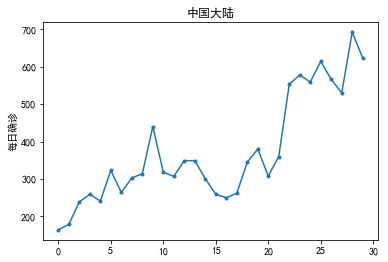

In [13]:
y = daily_diagnosis["大陆总计"].tolist()

plt.plot(y,marker = ".")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel("每日确诊",)
plt.title("中国大陆".encode('GBK').decode('GBK'))
plt.show()

是这样的，我在尝试异步请求时遇到了问题，jupyter的eventloop似乎与我的程序有冲突，所以我放弃了这个程序。
(ヘ･_･)ヘ┳━┳